### Problem 1

In [135]:
import numpy as np
from scipy.special import gammainc
from scipy.special import gamma
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology

[1.41253754]
[0.89125094]
[0.44668359]


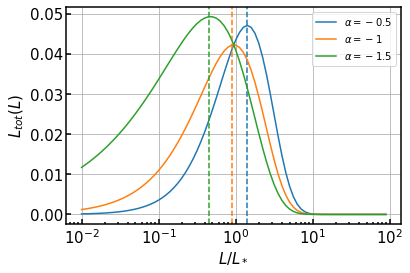

In [137]:
alpha_arr = [-0.5,-1,-1.5]
cs = ['tab:blue','tab:orange','tab:green']
for j,alpha in enumerate(alpha_arr):
    LL = 10**np.arange(-2,2,0.05)
    LtotL = gamma(alpha+2)*(1-gammainc(alpha+2,LL))
    for i in range(len(LL)-1):
        LtotL[i] = LtotL[i]-LtotL[i+1]
    plt.semilogx(LL,LtotL,label=rf'$\alpha={alpha}$',c=cs[j])
    plt.axvline(LL[np.where(LtotL==np.max(LtotL))],ls='--',c=cs[j])
    print(LL[np.where(LtotL==np.max(LtotL))])
plt.grid()
plt.legend()
plt.xlabel(r'$L$/$L_*$')
plt.ylabel(r'$L_{tot}(L)$')
plt.show()

### Problem 2

In [138]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from scipy.stats import linregress
from scipy.stats import t
from scipy.optimize import curve_fit
from scipy.special import gammaincc
from scipy.special import gamma

In [139]:
name = 'D://GoogleLimin/110-2/Galaxy/hw02/Skyserver_SQL4_9_2022 11_35_46 AM.fits'
hdul = pf.open(name)
redshift = hdul[1].data['z']
u = hdul[1].data['dered_u']
g = hdul[1].data['dered_g']
r = hdul[1].data['dered_r']
i = hdul[1].data['dered_i']
z = hdul[1].data['dered_z']

cosmo = cosmology.setCosmology('planck18')
dL = cosmo.luminosityDistance(redshift)/(cosmo.H0/100)

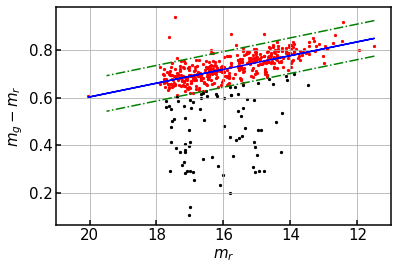

In [141]:
result  = []
thres_arr  = []
for i in range(18):
    thres = 0.05*(i+1)
    boolean = (g-r)>thres
    x_data = r[boolean]
    y_data = (g-r)[boolean]
    if( np.sum(boolean)>2 ):
        linear = linregress(x_data,y_data)
        result.append(linear)
        thres_arr.append(thres)
    
r_value = [abs(l.rvalue) for l in result]
idmax   = np.where(r_value==max(r_value))[0][0]
thres   = thres_arr[idmax]
boolean = (g-r)>thres
x_data = r[boolean]
y_data = (g-r)[boolean]

func = lambda x,a,b:a*x+b
popt, pcov = curve_fit(func, x_data, y_data)
perr       = np.sqrt(np.diag(pcov))

boolean = (g-r)>func(r,popt[0],popt[1]-3*perr[1])

plt.scatter(r[boolean],(g-r)[boolean],c='red',s=5)
plt.scatter(r[~boolean],(g-r)[~boolean],c='black',s=5)
x = np.arange(min(x_data),max(x_data),1)
plt.plot(x_data,func(x_data,*popt),c='blue')
plt.plot(x,func(x,popt[0],popt[1]-3*perr[1]),'-.',c='green')
plt.plot(x,func(x,popt[0],popt[1]+3*perr[1]),'-.',c='green')
plt.xlim([21,11])
plt.grid()
plt.xlabel('$m_r$')
plt.ylabel('$m_g-m_r$')
plt.show()

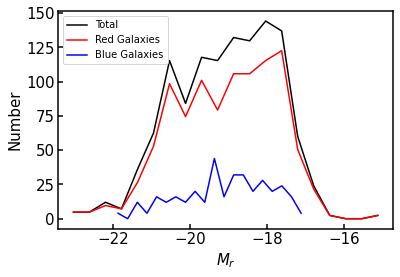

In [144]:
Mr = r-5*np.log10(dL)-25
Mr[boolean] += 0.19
Mr[~boolean] += -0.16
bins = 20
def get_histo(data,bins):
    hist, bedges = np.histogram(data,bins=bins)
    bedge = (bedges[1:]+bedges[:-1])/2
    return hist/(bedge[1]-bedge[0]),bedge
hist,bedge = get_histo(Mr,bins)
plt.plot(bedge,hist,c='black',label='Total')
hist,bedge = get_histo(Mr[boolean],bins)
plt.plot(bedge,hist,c='red',label='Red Galaxies')
hist,bedge = get_histo(Mr[~boolean],bins)
plt.plot(bedge,hist,c='blue',label='Blue Galaxies')

plt.legend()
plt.xlabel('$M_r$')
plt.ylabel('Number')
plt.show()

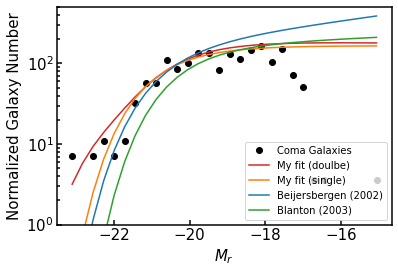

In [146]:
bins = 30
def get_histo(data,bins):
    hist, bedges = np.histogram(data,bins=bins)
    bedge = (bedges[1:]+bedges[:-1])/2
    return hist,bedge
hist, bedge = get_histo(Mr,bins)
plt.semilogy(bedge,hist/(bedge[1]-bedge[0]),'o',c='black',label='Coma Galaxies')

alpha = -1
Ms    = -20.5
phis  = 170
LL = 10**(0.4*(Ms-bedge))
Ntot1 = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
#plt.semilogy(bedge,Ntot1,'--',c='tab:red')

alpha = -0.9
Ms    = -22
phis  = 50
LL = 10**(0.4*(Ms-bedge))
Ntot2 = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
#plt.semilogy(bedge,Ntot2,'--',c='tab:red')
plt.semilogy(bedge,Ntot1+Ntot2,label='My fit (doulbe)',c='tab:red')

alpha = -1.0
Ms    = -21
phis  = 180
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='My fit (single)',c='tab:orange')

alpha = -1.16
Ms    = -20.87
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='Beijersbergen (2002)',c='tab:blue')

alpha = -1.05
Ms    = -20.44
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='Blanton (2003)',c='tab:green')

plt.legend(loc='lower right')
plt.xlabel('$M_r$')
plt.ylabel('Normalized Galaxy Number')
plt.ylim([1,500])
plt.show()

In [152]:
alpha = -0.5
Ms    = -20.5
Ls    = 10**(-Ms/2.5)
phis  = 170
LL = 10**(0.4*(Ms-bedge))
Ltot1 = phis*gamma(alpha+2)*gammaincc(alpha+2,LL)

alpha = -0.9
Ms    = -22
Ls    = 10**(-Ms/2.5)
phis  = 50
LL = 10**(0.4*(Ms-bedge))
Ltot2 = phis*gamma(alpha+2)*gammaincc(alpha+2,LL)

# plt.loglog(LL,Ltot1,label='My fit',c='tab:blue')
# plt.loglog(LL,Ltot2,label='My fit',c='tab:green')

Ltot = Ltot1+Ltot2
# plt.loglog(LL,Ltot,label='My fit',c='tab:red')
print(np.interp(0.1,LL,Ltot))
print(np.interp(0.01,LL,Ltot))
light = np.interp(0.01,LL,Ltot)
print('{:.3e}'.format(light*Ls*3.0128e2/3.828))
print(1.1e15/(light*Ls*3.0128e2/3.828))
light = np.interp(0.01,LL,Ltot1)
print(1.1e15/(light*Ls*3.0128e2/3.828))

198.1248265554296
198.1248265554296
9.839e+12
111.80350332210023
147.08793390305536


### Problem 3

In [3]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from colossus.cosmology import cosmology
from tqdm import tqdm
from scipy.stats import linregress

In [4]:
def my_plot_style():
    params = {'legend.fontsize': 10,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':1.5,
    'ytick.major.width':1.5,
    'xtick.minor.width':1.5,
    'ytick.minor.width':1.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

In [5]:
class sample:
    def __init__(self,ra,dec,z,setdL=False):
        self.ra  = ra
        self.dec = dec
        self.z   = z
        self.rmag   = None
        self.d4000 = None
        self.pri = None
        self.sec = None
        self.dL = None
        
        self.sky = SkyCoord(ra,dec,unit='deg')
        if( setdL ):
            cosmo = cosmology.setCosmology('planck18')
            self.dL = cosmo.luminosityDistance(self.z)/(cosmo.H0/100)
    
    def select(self,vlimit):
        bools = []
        for vals in vlimit:
            v, vmin, vmax = vals[0], vals[1], vals[2]
            boolean = (vmin<v)&(v<vmax)
            bools.append(boolean)
        boolean = np.sum(bools,axis=0)==len(bools)
        new = sample(self.ra[boolean],self.dec[boolean],self.z[boolean],setdL=True)
        new.d4000 = self.d4000[boolean]
        new.rmag  = self.rmag[boolean]
        return new
        
    def create_sample(self,ralim,declim,sep=5):
        vlimit = [[self.ra,ralim[0],ralim[1]],[self.dec,declim[0],declim[1]]]
        self.sec = self.select(vlimit)
        vlimit = [[self.ra,ralim[0]+sep,ralim[1]-sep],[self.dec,declim[0]+sep,declim[1]-sep]]
        self.pri = self.select(vlimit)
        
    def count(self,limit): # rmax in Mpc, dvlim in km/s
        n = np.zeros([len(self.pri.z),len(limit)])
        for i, p in tqdm(enumerate(self.pri.sky)):
            sep = p.separation(self.sec.sky).degree*np.pi/180*self.pri.dL[i] # Mpc
            dv  = abs(self.pri.z[i]-self.sec.z)*3e5
            for j, lim in enumerate(limit):
                rmax, dvlim = lim[0],lim[1]
                legal = (sep<rmax)&(dv<dvlim)
                n[i,j] = np.sum(legal)
        return n
    
    def count_v2(self,limit):
        n = np.zeros([len(self.pri.z),len(limit)])
        for i in tqdm(range(len(self.pri.z))):
            sep = np.sqrt((self.pri.ra[i]-self.sec.ra)**2.0+(self.pri.dec[i]-self.sec.dec)**2.0)\
                   *np.pi/180*self.pri.dL[i] # Mpc
            dv  = abs(self.pri.z[i]-self.sec.z)*3e5
            for j, lim in enumerate(limit):
                rmax, dvlim = lim[0],lim[1]
                legal = (sep<rmax)&(dv<dvlim)
                n[i,j] = np.sum(legal)
        return n

In [6]:
name = 'D://GoogleLimin/110-2/Galaxy/hw03/mpavagc_simp.fits'
hdul = pf.open(name)
hdul[1].header
yt = sample(hdul[1].data['RA'],hdul[1].data['DEC'],hdul[1].data['Z'])
yt.d4000 = hdul[1].data['D4000_N_SUB']
hdul.close()

name = 'D://GoogleLimin/110-2/Galaxy/hw03/nsa_v1_0_1.fits'
hdul = pf.open(name)
nsa = sample(hdul[1].data['RA'],hdul[1].data['DEC'],hdul[1].data['Z'])
nsa.rmag = hdul[1].data['SERSIC_ABSMAG'][:,4]
hdul.close()

In [7]:
def match(yt,nsa,sep=1,dz=0.001):
    idx,d2d,d3d = (yt.sky).match_to_catalog_sky(nsa.sky)
    bool1 = d2d<(sep/3600)*u.deg
    bool2 = abs(yt.z-nsa.z[idx])<0.001
    boolean = bool1&bool2
    
    mysample = sample(yt.ra[boolean],yt.dec[boolean],yt.z[boolean])
    mysample.d4000 = yt.d4000[boolean]
    mysample.rmag  = nsa.rmag[idx[boolean]]
    return mysample
mysample = match(yt,nsa)
print(f'Sample size {len(mysample.z)}')

Sample size 535752


In [8]:
vlimit = [[mysample.z,0.02,0.1],[mysample.rmag,-100,-20]]
sample1 = mysample.select(vlimit)
sample1.create_sample([100,270],[0,70])

In [9]:
vlimit = [[mysample.z,0.02,0.065],[mysample.rmag,-100,-19]]
sample2 = mysample.select(vlimit)
sample2.create_sample([100,270],[0,70])

Text(0, 0.5, 'r-band magnitude')

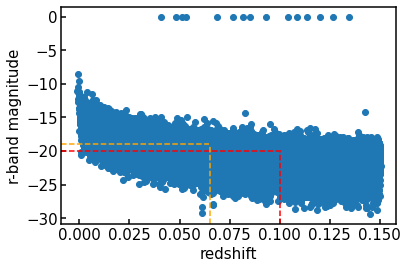

In [67]:
plt.scatter(mysample.z,mysample.rmag)
plt.axvline(0.1,0,10/30,ls='--',c='red')
plt.axhline(-20,0,0.112/0.17,ls='--',c='red')
plt.axvline(0.065,0,11/30,ls='--',c='orange')
plt.axhline(-19,0,0.044/0.1,ls='--',c='orange')
plt.xlabel('redshift')
plt.ylabel('r-band magnitude')

In [10]:
lim = [[1,250],[3,250],[5,250]]
sample1_result = sample1.count_v2(lim)
sample2_result = sample2.count_v2(lim)

100%|██████████████████████████████████████████████████████████████████████████| 71145/71145 [01:02<00:00, 1146.62it/s]


In [11]:
def get_d4000(sample,result,select=[]):
    pool = sample.pri.d4000
    if( len(select)!=0 ):
        result = result[select]
        pool   = pool[select]
        print(f'Using sample {np.sum(select)}')
    nn = np.arange(1,int(max(result))+1)
    d4000 = []
    for i in range(int(max(result))):
        samp = result==(i+1)
        if( np.sum(samp)!=0 ): d4000.append([np.mean(pool[samp]),np.std(pool[samp])])
        else: d4000.append([-1,-1])
    return nn,np.array(d4000)

def get_kauff(sample,result,select=[]):
    pool = sample.pri.d4000
    if( len(select)!=0 ):
        result = result[select]
        pool   = pool[select]
        print(f'Using sample {np.sum(select)}')
    n = 150
    idx = np.argsort(result)
    result, pool = result[idx], pool[idx]
    nn, d4000 = [], []
    for i in range(int(len(pool)//n)):
        nn.append(np.median(result[i*n:(i+1)*n]))
        d4000.append([np.median(pool[i*n:(i+1)*n]),np.std(pool[i*n:(i+1)*n])])
    return np.array(nn),np.array(d4000)

Using sample 26160
Using sample 115494


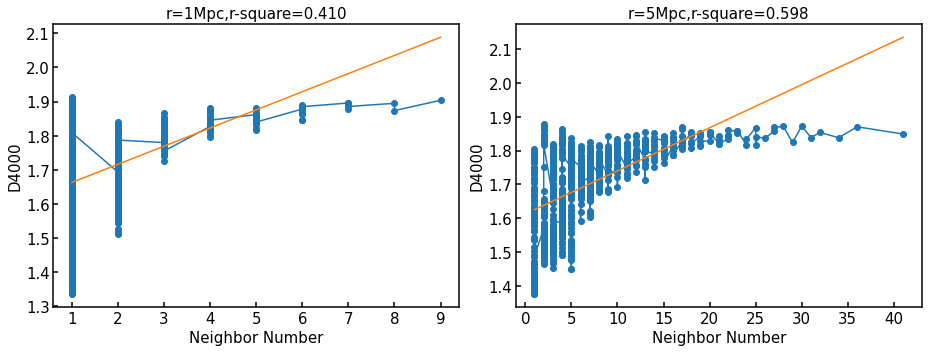

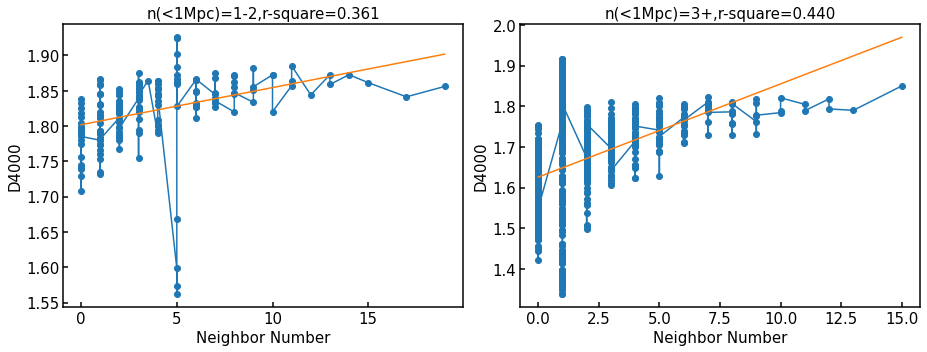

In [129]:
plt.figure(figsize=(13,5))
titles = ['r=1Mpc','r=5Mpc']
for i,idx in enumerate([0,2]):
    plt.subplot(1,2,i+1)
    result = sample1_result[:,idx]
    nn, d4000 = get_kauff(sample1,result)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    #plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

select = sample1_result[:,0]>2
dn = sample1_result[:,1]-sample1_result[:,0]
plt.figure(figsize=(13,5))
titles = ['n(<1Mpc)=1-2','n(<1Mpc)=3+']
for i,idx in enumerate([select,~select]):
    plt.subplot(1,2,i+1)
    nn, d4000 = get_kauff(sample1,dn,select=idx)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    #plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

Using sample 22378
Using sample 100689


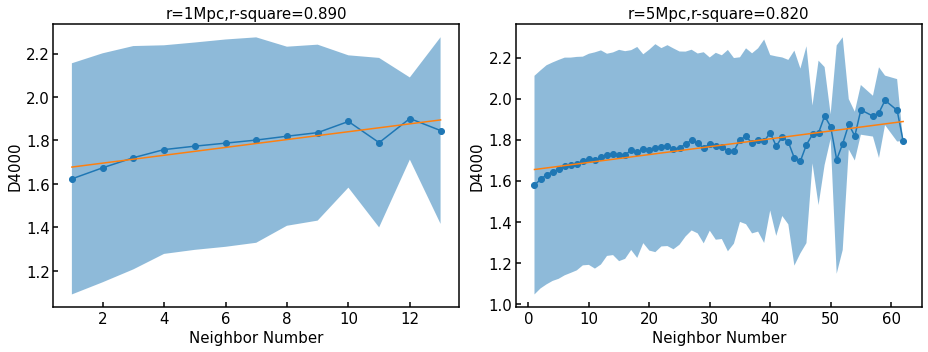

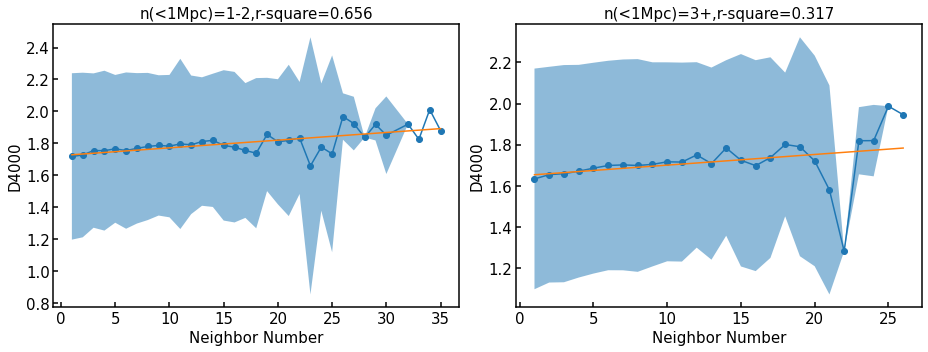

In [13]:
plt.figure(figsize=(13,5))
titles = ['r=1Mpc','r=5Mpc']
for i,idx in enumerate([0,2]):
    plt.subplot(1,2,i+1)
    result = sample1_result[:,idx]
    nn, d4000 = get_d4000(sample1,result)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

select = sample1_result[:,0]>2
dn = sample1_result[:,1]-sample1_result[:,0]
plt.figure(figsize=(13,5))
titles = ['n(<1Mpc)=1-2','n(<1Mpc)=3+']
for i,idx in enumerate([select,~select]):
    plt.subplot(1,2,i+1)
    nn, d4000 = get_d4000(sample1,dn,select=idx)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

Using sample 23568
Using sample 47577


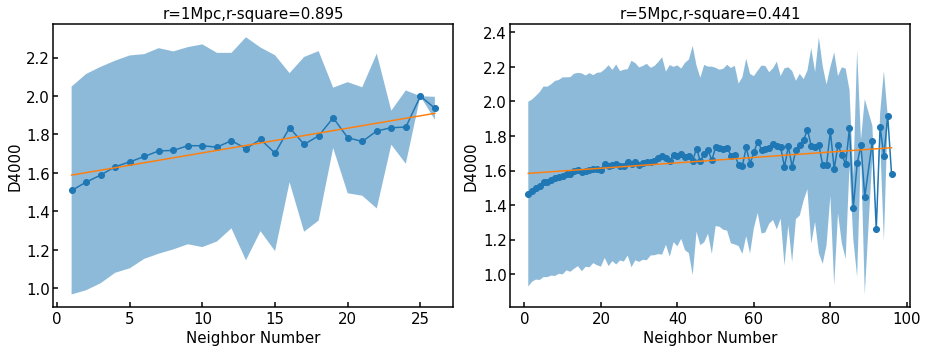

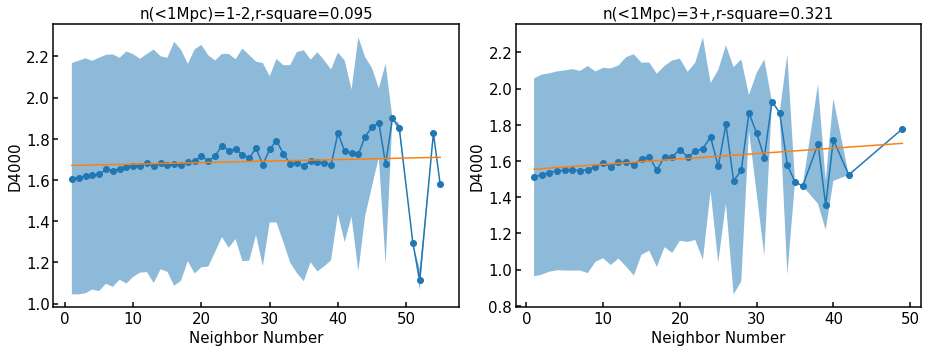

In [14]:
plt.figure(figsize=(13,5))
titles = ['r=1Mpc','r=5Mpc']
for i,idx in enumerate([0,2]):
    plt.subplot(1,2,i+1)
    result = sample2_result[:,idx]
    nn, d4000 = get_d4000(sample2,result)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

select = sample2_result[:,0]>2
dn = sample2_result[:,1]-sample2_result[:,0]
plt.figure(figsize=(13,5))
titles = ['n(<1Mpc)=1-2','n(<1Mpc)=3+']
for i,idx in enumerate([select,~select]):
    plt.subplot(1,2,i+1)
    nn, d4000 = get_d4000(sample2,dn,select=idx)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

In [15]:
lim = [[1,500],[3,500],[5,500]]
sample3_result = sample1.count_v2(lim)
sample4_result = sample2.count_v2(lim)

100%|███████████████████████████████████████████████████████████████████████████| 71145/71145 [01:24<00:00, 844.56it/s]


Using sample 32841
Using sample 90226


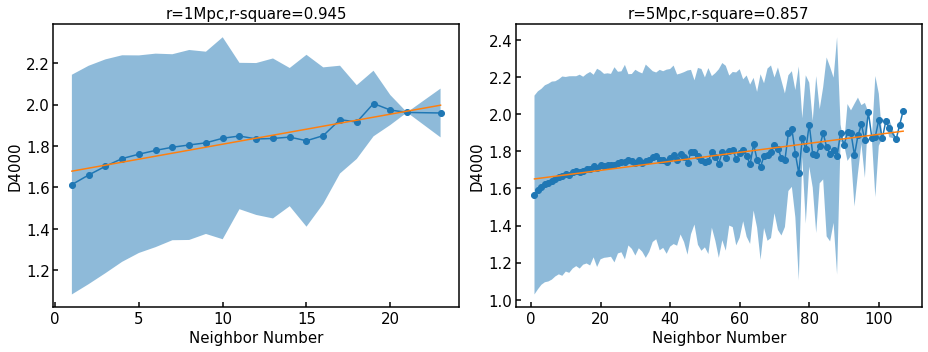

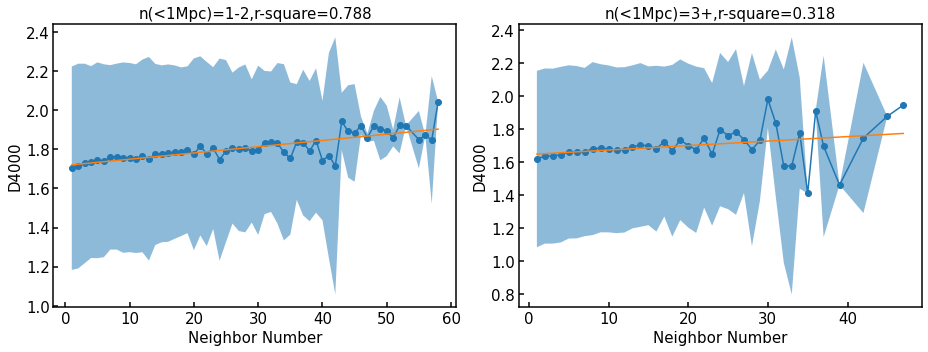

In [16]:
plt.figure(figsize=(13,5))
titles = ['r=1Mpc','r=5Mpc']
for i,idx in enumerate([0,2]):
    plt.subplot(1,2,i+1)
    result = sample3_result[:,idx]
    nn, d4000 = get_d4000(sample1,result)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

select = sample3_result[:,0]>2
dn = sample3_result[:,1]-sample3_result[:,0]
plt.figure(figsize=(13,5))
titles = ['n(<1Mpc)=1-2','n(<1Mpc)=3+']
for i,idx in enumerate([select,~select]):
    plt.subplot(1,2,i+1)
    nn, d4000 = get_d4000(sample1,dn,select=idx)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

Using sample 29303
Using sample 41842


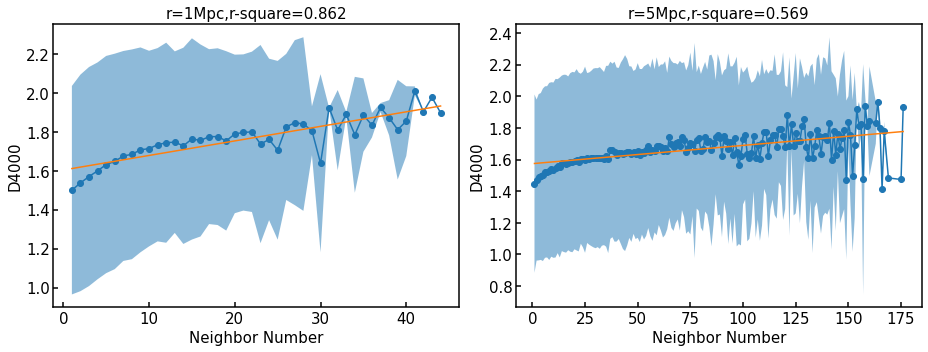

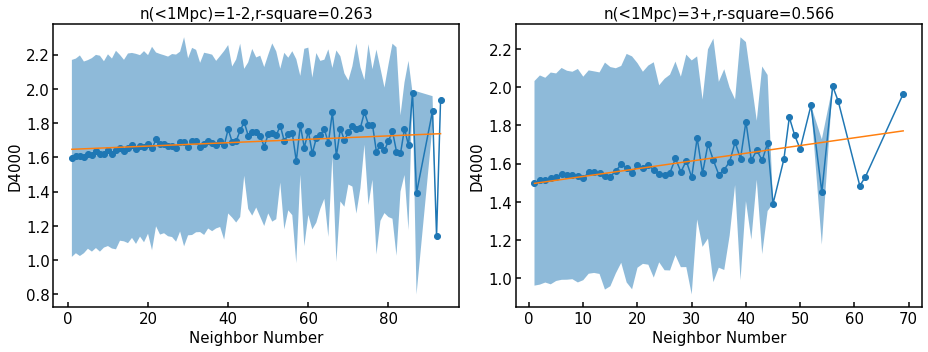

In [17]:
plt.figure(figsize=(13,5))
titles = ['r=1Mpc','r=5Mpc']
for i,idx in enumerate([0,2]):
    plt.subplot(1,2,i+1)
    result = sample4_result[:,idx]
    nn, d4000 = get_d4000(sample2,result)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()

select = sample4_result[:,0]>2
dn = sample4_result[:,1]-sample4_result[:,0]
plt.figure(figsize=(13,5))
titles = ['n(<1Mpc)=1-2','n(<1Mpc)=3+']
for i,idx in enumerate([select,~select]):
    plt.subplot(1,2,i+1)
    nn, d4000 = get_d4000(sample2,dn,select=idx)
    boolean = d4000[:,0]!=-1
    nn, d4000 = nn[boolean],d4000[boolean]
    plt.plot(nn,d4000[:,0],'-o')
    slope, intercept, r, p, se = linregress(nn, d4000[:,0])
    plt.plot(nn,slope*nn+intercept)
    plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
    plt.title(titles[i]+f',r-square={r:.3f}')
    plt.xlabel('Neighbor Number')
    plt.ylabel('D4000')
plt.tight_layout()